## 长短时神经网络——Regression example

这里刚好有个小 tip，我们做 两个 model

即：是否对 y 进行标准化并不是一个**对错问题，且一般不对 y 进行标准化操作！**

值得注意的问题是：
1. 不对 y 进行标准化，收敛较慢，loss 可能会大一些，但精度有保证。
2. 对 y 进行标准化后，最后要对 y 反标准化，虽然收敛速度会加快，但容易过拟合，且在反标准化的过程中，会使精度丢失！

### model 1: 不对 y 进行标准化

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 导入数据集
stock_file = './dataset/dataset.csv'
stock = pd.read_csv(stock_file)

In [3]:
stock.head(5)

,Month,values
0,Jan-49,112
1,Feb-49,118
2,Mar-49,132
3,Apr-49,129
4,May-49,121


In [4]:
label = stock['values']

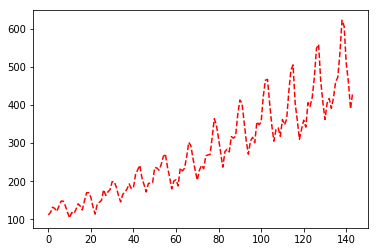

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(label)), label, 'r--')
plt.show()

In [6]:
dataset = stock.values[:, -1:]
print(dataset.dtype)
dataset.shape

object


(144, 1)

In [7]:
# Because the type of dataset is object, we need to change the type to 'float32'
dataset = dataset.astype(np.float32)
print(dataset.dtype)

float32


### 调用 tools 里面的 create_dataset 函数，构造适应的数据集，look_back 默认为 7，即 (x-7) 天预测第 x 天

构造数据集的时候，一般而言，会将 y 也作为 X 的一部分，故 need_label 默认为 True， 当然也可以设置为 False，不用 y 作为 input

In [8]:
from frames.tools import create_dataset

X, y = create_dataset(dataset, look_back=2, need_label=True)

In [9]:
print(X.shape)
print(y.shape)

(142, 2, 1)
(142, 1)


### 切割数据集

In [10]:
from frames.tools import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.dtype, y_train.dtype)

(113, 2, 1) (29, 2, 1) (113, 1) (29, 1)
float32 float32


### 调用 DeeplearningRegression 里面的 LSTM 框架

In [12]:
from frames.DeeplearningRegression import LSTM

'''
参数说明：
hidden_layers: 隐藏层神经元个数，传入 int
num_layers: lstm 层数，传入 int
learning rete: 学习率，这里可以是一个 float，也可以是一个 len=3 的 list，当 lr 是 list 的时候，采用梯度衰减策略
activate function: 激活函数，默认 relu，改激活函数输入小写字符串即可，如：'tanh','sigmoid'
dropout: 默认为 0，即不采用，这个参数是为了防止训练过拟合
epoch: 训练批次，默认 2000
batch_size: 默认 128
'''
lstm = LSTM(learning_rate=[1e-2, 1e-4, 1e-6], num_layers=2, hidden_size=32, epoch=10000, batch_size=256) # 采用梯度衰减策略

In [13]:
lstm.fit(X_train, y_train)

Training... epoch: 100, loss: 85357.703125
Training... epoch: 200, loss: 77912.3203125
Training... epoch: 300, loss: 71147.5234375
Training... epoch: 400, loss: 64965.7109375
Training... epoch: 500, loss: 59316.36328125
Training... epoch: 600, loss: 54161.578125
Training... epoch: 700, loss: 49468.7265625
Training... epoch: 800, loss: 45208.12890625
Training... epoch: 900, loss: 41352.03125
Training... epoch: 1000, loss: 37874.140625
Training... epoch: 1100, loss: 34749.31640625
Training... epoch: 1200, loss: 31953.40234375
Training... epoch: 1300, loss: 29463.126953125
Training... epoch: 1400, loss: 27256.009765625
Training... epoch: 1500, loss: 25310.306640625
Training... epoch: 1600, loss: 23605.01171875
Training... epoch: 1700, loss: 22119.798828125
Training... epoch: 1800, loss: 20835.0625
Training... epoch: 1900, loss: 19731.919921875
Training... epoch: 2000, loss: 18792.224609375
Training... epoch: 2100, loss: 17998.63671875
Training... epoch: 2200, loss: 17334.63671875
Training

### 调用 score 得到结果，调用 predict 得到值

In [14]:
lstm.score(X_test, y_test)

mse: 1354.80078125, rmse: 36.8076171875, mae: 26.300046920776367, r2: 0.8820964199692866


### 调用 result_plot 保存结果图

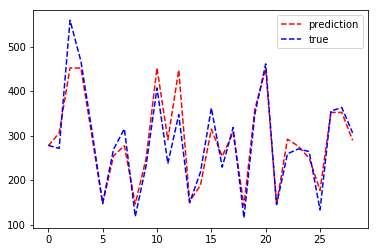

Save the picture successfully!


In [15]:
import os

save_path = './Example_save_resultes/save_pngs'
if not os.path.exists(save_path):
    os.makedirs(save_path)
    
save_png = os.path.join(save_path, 'lstm_picture.png')
lstm.result_plot(X_test, y_test, save_file=save_png, is_show=True)

### 保存模型结果, 这里有两个参数，统计 dataset 是否使用了 标准化 和 pca 的预处理

In [16]:
results_file = './Example_save_resultes/lstm_result.csv'
lstm.save_result(results_file, is_standard=False, is_PCA=False)

Save results success!


### 调用 loss_plot 查看训练过程， loss 的变化

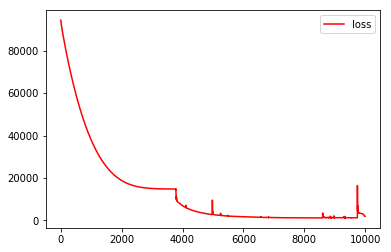

In [17]:
lstm.loss_plot()

# 对 y 进行标准化操作

在机器学习里，认为 训练集（training set）的分布符合总体分布

In [18]:
# 对数据进行 标准化，将最后 百分之20，作为 测试集 
# 但是这里标准化后还是要合并，后续要给数据格式进行处理
train_size = int(len(dataset) * 0.8)
data_train = dataset[:train_size]
data_test = dataset[train_size:]

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(data_train)

data_train_standard = standard.transform(data_train)
data_test_standard = standard.transform(data_test)

# 合并
dataset_standard = np.concatenate((data_train_standard, data_test_standard), axis=0)
print('the shape of dataset_standard is: ', dataset_standard.shape)

the shape of dataset_standard is:  (144, 1)


In [23]:
from frames.tools import create_dataset

X, y = create_dataset(dataset_standard, look_back=2)

In [24]:
from frames.tools import train_test_split

X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X, y, test_size=0.2, random_state=19)

In [25]:
from frames.DeeplearningRegression import LSTM

'''
参数说明：
hidden_layers: 隐藏层神经元个数，传入 int
num_layers: lstm 层数，传入 int
learning rete: 学习率，这里可以是一个 float，也可以是一个 len=3 的 list，当 lr 是 list 的时候，采用梯度衰减策略
activate function: 激活函数，默认 relu，改激活函数输入小写字符串即可，如：'tanh','sigmoid'
dropout: 默认为 0，即不采用，这个参数是为了防止训练过拟合
epoch: 训练批次，默认 2000
batch_size: 默认 128
'''
lstm2 = LSTM(learning_rate=[1e-2, 1e-4, 1e-6], num_layers=2, hidden_size=32, epoch=10000, batch_size=256) # 采用梯度衰减策略

In [26]:
lstm2.fit(X_train_standard, y_train_standard)

Training... epoch: 100, loss: 0.10185768455266953
Training... epoch: 200, loss: 0.08832947164773941
Training... epoch: 300, loss: 0.08447837829589844
Training... epoch: 400, loss: 0.07607705891132355
Training... epoch: 500, loss: 0.06763128936290741
Training... epoch: 600, loss: 0.059247009456157684
Training... epoch: 700, loss: 0.043951235711574554
Training... epoch: 800, loss: 0.03877587616443634
Training... epoch: 900, loss: 0.029109004884958267
Training... epoch: 1000, loss: 0.02427276410162449
Training... epoch: 1100, loss: 0.023603498935699463
Training... epoch: 1200, loss: 0.014321276918053627
Training... epoch: 1300, loss: 0.01298401691019535
Training... epoch: 1400, loss: 0.010950428433716297
Training... epoch: 1500, loss: 0.006075561046600342
Training... epoch: 1600, loss: 0.005935847759246826
Training... epoch: 1700, loss: 0.005633251275867224
Training... epoch: 1800, loss: 0.004128455650061369
Training... epoch: 1900, loss: 0.017945317551493645
Training... epoch: 2000, loss

没有进行标准化得到的结果

In [27]:
lstm2.score(X_test_standard, y_test_standard)

mse: 0.43841803073883057, rmse: 0.6621314287185669, mae: 0.5439490675926208, r2: 0.684395604851685


### 反标准化

In [30]:
prediction_standard = lstm2.predict(X_test_standard).data.numpy()

prediction = standard.inverse_transform(prediction_standard)
y_true = standard.inverse_transform(y_test_standard)

from frames.tools import reg_calculate

reg_calculate(y_true, prediction)

mse: 3626.531982421875, rmse: 60.22069549560547, mae: 49.472042083740234, r2: 0.6843955892093101


(3626.532, 60.220695, 49.472042, 0.6843955892093101)

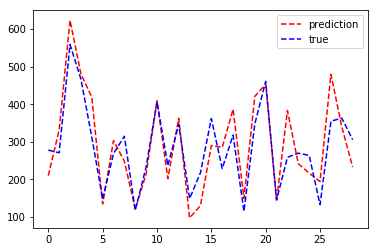

In [31]:
plt.plot(range(len(prediction)), prediction, 'r--', label='prediction')
plt.plot(range(len(y_true)), y_true, 'b--', label='true')
plt.legend()
plt.show()

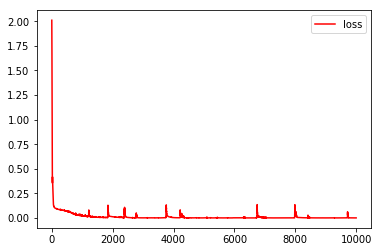

In [32]:
lstm2.loss_plot()